## Q3 Linear regression
This exercise requires the student to understand the basics of linear regression using stochastic gradient descent. To start any machine learning task, it requires data exploration and data cleaning. We will be using a real-life dataset from an insurance company which includes details about its customers such as age, sex, bmi and number of children which will be used as the independent variables to predict the medical charges of the customer (the dependent variable). To get more details about the dataset, please explore the link provided below.

https://www.kaggle.com/code/gloriousc/insurance-forecast-by-using-linear-regression/data

### Reading the data
To start of, we will be making use of pandas library to read and do brief data cleaning. We will be using the insurance.csv to train our model and this model will be tested for its performance using the nba_data_test.csv file. 

In [1]:
import pandas as pd

In [2]:
#Read "insurance.csv" file into variable "df":[2 points]
df = pd.read_csv("insurance.csv") ##TODO##
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130


As you can observe, our dataset seems to be quite complete. However, we do not know for sure if our dataset has any missing values. To tackle this problem, we could either remove the null valued row or column or replace the value with either median value or a user defined value. For our dataset, make use of an in-built function in pandas to remove all the null values.

In [3]:
#Remove all the null values using a built-in function [2 points]
df = df.dropna() ##TODO## 
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130


### One-hot encoding (interesting concept to learn)
For machine learning tasks, we prefer to have our input data in number format as machines understand data using numbers. However, our dataset currently has text data (sex is either "male" or "female"). Instead of representing this column using text, we can explore a technique called one-hot encoding. 

One hot encoding is one method of converting data to prepare it for an algorithm. In this technique, we will represent each value of the column using 1 or 0. For example for the column sex, we will create two columns, sex_male and sex_female where if the user's sex is male, sex_male will have a value of 1 and sex_female will have a value of 0. We will be doing this for all the categorical columns which are sex, smoker and region.

In [4]:
one_hot_encoded_columns = pd.get_dummies(df[['sex','smoker','region']])
one_hot_encoded_columns

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1323,1,0,0,1,0,0,1,0
1324,0,1,1,0,0,1,0,0
1325,0,1,1,0,1,0,0,0
1326,1,0,1,0,1,0,0,0


In [5]:
df = pd.concat([df,one_hot_encoded_columns], axis = 1)
df

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,42,female,40.370,2,yes,southeast,43896.37630,1,0,0,1,0,0,1,0
1324,31,male,25.935,1,no,northwest,4239.89265,0,1,1,0,0,1,0,0
1325,61,male,33.535,0,no,northeast,13143.33665,0,1,1,0,1,0,0,0
1326,42,female,32.870,0,no,northeast,7050.02130,1,0,1,0,1,0,0,0


We can remove the column sex, smoker and region as they can been replaced by their one hot encoded versions. 

In [6]:
#Remove the column sex, smoker and region [2 points]
df = df.drop(['sex','smoker','region'], axis = 1) ##TODO## 
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1323,42,40.370,2,43896.37630,1,0,0,1,0,0,1,0
1324,31,25.935,1,4239.89265,0,1,1,0,0,1,0,0
1325,61,33.535,0,13143.33665,0,1,1,0,1,0,0,0
1326,42,32.870,0,7050.02130,1,0,1,0,1,0,0,0


To add bias (an offset) for our regression model, we will add the column with value 1. This will act as the bias (an offset) for our regression model

In [7]:
df['bias'] = 1

After processing our dataset, we can separate the columns into "features" which are used as an input for our model and "target" which is the predicted value by our model. 

In [8]:
train_target = df['charges'].to_numpy()
train_features = df.drop(['charges'], axis = 1).to_numpy()
print("Shape of target : ", train_target.shape)
print("Shape of features : ", train_features.shape)
df

Shape of target :  (1328,)
Shape of features :  (1328, 12)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bias
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,1
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,1
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,42,40.370,2,43896.37630,1,0,0,1,0,0,1,0,1
1324,31,25.935,1,4239.89265,0,1,1,0,0,1,0,0,1
1325,61,33.535,0,13143.33665,0,1,1,0,1,0,0,0,1
1326,42,32.870,0,7050.02130,1,0,1,0,1,0,0,0,1


## Fill up the functions given below to implement a linear regression using closed form solution, stochastic gradient descent, and ridge regression. It is encouraged to make use of numpy library as it is computationally efficient.

In [9]:
import numpy as np
import random

In [10]:
#Please write a function below that returns the velue of training error. 
#"pre_y" is the predicted vector; "y" is the target vector; "n" is the number of data points. 

def calc_half_mse(pred_y, y, n):
    
    ##TODO## [3 points]
    diff = y - pred_y
    return diff.dot(diff) / (2*n)  
    #######

### Let's Implement Closed Form Solution

In [11]:
#Please write a function below that implements Closed-form Solution. 
#"X" is the matrix of training data points; "y" is the target vector.

def closed_form(X, y):
    
    ##TODO## [4 points]
    A = (X.T.dot(X))*(1/(len(y)))
    b = (X.T.dot(y))*(1/(len(y)))
    theta = np.linalg.pinv(A).dot(b)
    ########
    return theta

In [12]:
theta = closed_form(train_features, train_target)
pred_y = train_features.dot(theta)
print(f'Closed Form solution\n'
      f'Training error: {calc_half_mse(pred_y, train_target, len(train_target))}')

Closed Form solution
Training error: 18184496.217334226


### Stochastic Gradient Descent

In [13]:
# Please write a function below that implements stochastic gradient descent for linear regression. 
# After each update of "theta," please also calculate the training error for your updated "theta" vector.
# Your output are the final (optimized) "theta" vector and the final training error.
#"theta" is the initial theta vector; "X" is the matrix of training data points; "y" is the target vector; "n" is the number of training data points; 
#"learning_rate" is a very small constant, "epochs" is the number of times your algorithm running through the whole dataset.

def stochastic_gd(theta, X, y, n, learning_rate, epochs):
    
    ##TODO## [6 points]
    epoch=0
    total_samples = n * epochs
    error = 0  
    best_theta = theta
    best_error = np.inf
    for sample in range(total_samples):
        i = random.randrange(0, n)
        theta = theta + learning_rate * (y[i] - X[i].dot(theta)) * X[i]
        error = calc_half_mse(X.dot(theta), y, n)
        if error < best_error:
            best_theta = theta
            best_error = error
    #####
    
    return best_theta, best_error

In [14]:
random.seed(5)
theta = np.zeros(len(train_features[0]))
theta, error = stochastic_gd(theta, train_features, train_target, len(train_target), 0.0001, epochs=5)
print(theta, error)

[  186.23756552   231.82742572   236.62416437  -213.63828714
   100.5455442  -2423.34976577  2310.25702284   -11.40805751
  -126.79904746   108.49741462   -83.38305259  -113.09274294] 48669296.84607873


In [16]:
random.seed(5)
theta = np.zeros(len(train_features[0]))
theta, error = stochastic_gd(theta, train_features, train_target, len(train_target), 0.000001, epochs=5)
print(theta, error)

[ 2.13969548e+02  1.65835327e+02  9.85245318e+00 -2.59786882e-01
  4.16063599e+00 -2.30302047e+01  2.69310538e+01  1.06452077e+00
 -2.05342714e-01  2.85764397e+00  1.84027082e-01  3.90084911e+00] 65401797.30200331


### Stochastic Gradient Descent with Ridge Regression

In [18]:
# Please write a function below that implements stochastic gradient descent for Ridge regression. 
# After each update of "theta," please also calculate the training error for your updated "theta" vector.
# Your output are the final (optimized) "theta" vector and the final training error
#"theta" is the initial theta vector; "X" is the matrix of training data points; "y" is the target vector; "n" is the number of training data points; 
#"learning_rate" is a very small constant, "epochs" is the number of times your algorithm running through the whole dataset.

def calc_half_mse(pred_y, y, n):
    
    ##TODO## [3 points]
    diff = y - pred_y
    return diff.dot(diff) / (2*n)
    #######

def stochastic_gd_with_ridge(theta, X, y, n, learning_rate, epochs, lambd):
    epoch=0
    ##TODO## [6 points]
    total_samples = n * epochs
    best_error = np.inf
    best_theta = theta
    for sample in range(total_samples):
        i = random.randrange(0, n)
        theta = (1-lambd*learning_rate)*theta + learning_rate * (y[i] - X[i].dot(theta)) * X[i]
        error = calc_half_mse(X.dot(theta), y, n) + (1/2) * lambd * theta.dot(theta)
        if error < best_error:
            best_theta = theta
            best_error = error
    ######
    
    return best_theta, best_error

In [22]:
# try out different values of lambda and see how the error value changes
# listoflambd = [0.00001, 0.1, 0.5, 1, 1000]
listoflambd = [0.00001, 0.1, 0.5, 1, 1000]
listoferror = []
for lambd in listoflambd:
  random.seed(5)
  theta = np.zeros(len(train_features[0]))
  theta, whaterror = stochastic_gd_with_ridge(theta, train_features, train_target, len(train_target), 0.000001, epochs=5, lambd=lambd)
  error = calc_half_mse(train_features.dot(theta), train_target, len(train_target))
  listoferror.append(error)
  print(theta, error)

[ 2.13969547e+02  1.65835326e+02  9.85245299e+00 -2.59786802e-01
  4.16063594e+00 -2.30302038e+01  2.69310529e+01  1.06452076e+00
 -2.05342673e-01  2.85764394e+00  1.84027103e-01  3.90084913e+00] 65401797.30906052
[ 2.13961848e+02  1.65828013e+02  9.85051267e+00 -2.58990988e-01
  4.16008700e+00 -2.30214606e+01  2.69225566e+01  1.06450145e+00
 -2.04937596e-01  2.85729393e+00  1.84238230e-01  3.90109601e+00] 65401868.00246983
[ 2.13931056e+02  1.65798764e+02  9.84275997e+00 -2.55811445e-01
  4.15789324e+00 -2.29865232e+01  2.68886050e+01  1.06442444e+00
 -2.03318820e-01  2.85589425e+00  1.85081932e-01  3.90208179e+00] 65402153.37011068
[ 2.13892575e+02  1.65762222e+02  9.83309012e+00 -2.51846068e-01
  4.15515598e+00 -2.29429388e+01  2.68462487e+01  1.06432877e+00
 -2.01299155e-01  2.85414574e+00  1.86134558e-01  3.90330992e+00] 65402515.84889065
[156.90967552 117.19217566   4.55259899   1.22612169   2.35164847
  -1.16172391   4.73949407   1.0362681    0.66722018   1.22846204
   0.6458198

# Question 4: Implement K-means

The K-means algorithm alternatingly finds best clusters for centroids, and best centroids for clusters. This is a method of **unsupervised learning** where you are able to classify data points despite not knowing their labels.

**Question 4a: Explain in pseudo-code how the K-means algorithm work. [6 points]**

✅ Answer:

**General procedure**
1. Pick K points as the initial centroids from the data set, either randomly or the first K.
2. Find the Euclidean distance of each point in the data set with the identified K points — cluster centroids.
3. Assign each data point to the closest centroid using the distance found in the previous step.
4. Find the new centroid by taking the average of the points in each cluster group.
5. Repeat 2 to 4 for a fixed number of iteration or till the centroids don’t change.

Pseudocode:
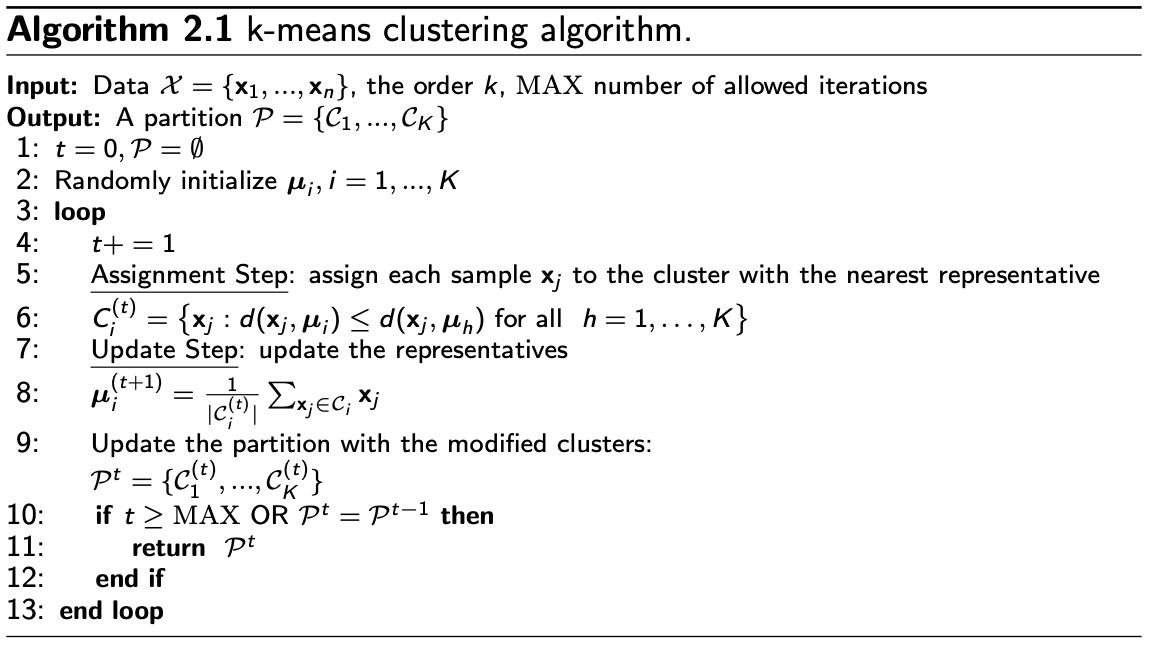

In [ ]:
'''
Coding Question 2:

2a) Implement K-means from scratch.

2b) Randomise initialisation of the starting point and explain your observation
'''

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

## The dataset you will be using is the California dataset in sklearn
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data,columns=housing.feature_names)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_data = housing_df.loc[:, ["MedInc", "Latitude", "Longitude"]].sample(frac=0.3, random_state=1)
X = StandardScaler().fit_transform(X_data)
X

In this question, we'll cluster these with 'MedInc' (median income) to create economic segments in different regions of California.

3a) Implement K-means from scratch.

In [ ]:
import random
class K_Means:
    def __init__(self, k=6, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        #set the first 6 points as the initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]
        

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []
            
            '''
            Assignment step: Here you are supposed to:
            1) calculate the distance of each datapoint from the k centroids
            2) Store the distances in a []. EG: (x1,y1) to centroid 1 = Distance 1, (x1,y1) to centroid 2 = Distance 2 ...
            3) Get the index of the centroid that gives the minimum distance
            4) Assign the point to that centroid and store it in self.classifications
            '''
            
            for featureset in data:
              # Your code here 👇# [9 points]
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
              ####################

            prev_centroids = dict(self.centroids)
            
            '''
            Update step: Here you are supposed to:
            1) Recalculate the distances and reassign the centroids by calculating the average or all the distances
            '''

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0) # Your code here: Calculate average#
                #[3 points]
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [ ]:
model = K_Means()
model.fit(X)

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm

colors=["red","blue", "green", "yellow", "pink", "orange"]

for classification in model.classifications:
    print("Classification:" + str(classification) + "/" + str(len(model.classifications)-1))
    color = colors[classification]
    for featureset in tqdm(model.classifications[classification]):
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

for centroid in tqdm(model.centroids):
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)
        
plt.show()

3b) Randomise initialisation of the starting point and explain your observation. (Does the algorithm always converge to the same outcome? Why or why not?)

✅ Answer: It does not converge to the same outcome as shown below. This is because kmeans converges to a local minimum instead of a global minimum according to how you initialise the staritng points.

In [ ]:
import random
class K_Means_Rand:
    def __init__(self, k=6, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        '''randomise 6 points as the initial centroids using Random'''
        choices = random.choices(data, k=6) # Your code here [3 points]# 

        for i in range(self.k):
            self.centroids[i] = choices[i]
        
        # print(self.centroids)

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                 # Your code here 👇 (the same one as the one you have already written above, just copy and paste)#  
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                 ####################

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0) # Your code here: the same as the one you have already written above, just copy and paste#

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    # print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [ ]:
model = K_Means_Rand()
model.fit(X)

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm

colors=["red","blue", "green", "yellow", "pink", "orange"]

for classification in model.classifications:
    print("Classification:" + str(classification) + "/" + str(len(model.classifications)))
    color = colors[classification]
    for featureset in tqdm(model.classifications[classification]):
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

for centroid in tqdm(model.centroids):
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)
        
plt.show()

2c) What are the weaknesses of K-means? (Write at least 2 weaknesses) [4 points]

✅ Answer:

Disadvantages of k-means
1. Choosing k manually.

**Solution**: Use the “Loss vs. Clusters” plot to find the optimal (k).

2. Being dependent on initial values.

**Solution**: For a low k, you can mitigate this dependence by running k-means several times with different initial values and picking the best result. As  increases, you need advanced versions of k-means to pick better values of the initial centroids (called k-means seeding).

3. Clustering data of varying sizes and density.

**Solution**: k-means has trouble clustering data where clusters are of varying sizes and density. To cluster such data, you need to generalize k-means.

4. Clustering outliers.

**Solution**: Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Consider removing or clipping outliers before clustering.

5. Scaling with number of dimensions.

**Solution**: As the number of dimensions increases, a distance-based similarity measure converges to a constant value between any given examples. Reduce dimensionality either by using PCA on the feature data, or by using “spectral clustering” to modify the clustering algorithm.